# 15.3 stock_load: 간단한 데이터 리더

In [4]:
import pandas_datareader.data as web

def load_stock(ticker_str):
    '''주식 적재 함수.
    인수로 주어진 문자열 ticker_str의 정보를 적재한다.
    'MSFT'와 같이 정해진 주식 정보를 pandas 데이터 프레임에 넣고 반환한다.
    
    '''
    df = web.DataReader(ticker_str, 'yahoo')
    df = df.reset_index()
    return df

# 데이터 프레임(stock_df)을 가져와서 출력한다.
if __name__ == '__main__':
    stock_df = load_stock('MSFT')   # 'msft'도 괜찮다.
    print(stock_df)
    print(stock_df.columns)

           Date        High         Low        Open       Close      Volume  \
0    2017-11-15   83.690002   82.690002   83.470001   82.980003  19383100.0   
1    2017-11-16   83.419998   82.940002   83.099998   83.199997  20962800.0   
2    2017-11-17   83.120003   82.239998   83.120003   82.400002  22079000.0   
3    2017-11-20   82.589996   82.250000   82.400002   82.529999  16315000.0   
4    2017-11-21   83.839996   82.739998   82.739998   83.720001  21237500.0   
...         ...         ...         ...         ...         ...         ...   
1253 2022-11-08  231.649994  225.839996  228.699997  228.869995  28192500.0   
1254 2022-11-09  228.630005  224.330002  227.369995  224.509995  27852900.0   
1255 2022-11-10  243.330002  235.000000  235.429993  242.979996  46268000.0   
1256 2022-11-11  247.990005  241.929993  242.990005  247.110001  34600900.0   
1257 2022-11-14  243.910004  239.210007  241.985001  241.550003  30966872.0   

       Adj Close  
0      78.363731  
1      78.571

# 15.4 간단한 주식 차트 만들기

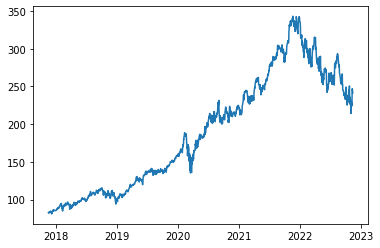

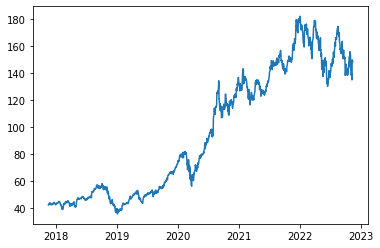

In [6]:
'''
2개의 지정 주식에 대한 종장 시세로 최소 그래프를 그린다.
file stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

def do_plot(stock_df):
    '''플롯을 수행하는 함수
    stock_df를 사용하여 웹에서 주식 데이터 프레임을 읽어온다.
    '''
    column = stock_df.Close                    # 시세 추출
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column)            # 플룻 수행
    plt.show()                                 # 그래프 출력
    
# 2개의 테스트 케이스 수행
if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_plot(stock_df)
    stock_df = load_stock('AAPL')
    do_plot(stock_df)

# 15.5 제목과 범례 추가하기

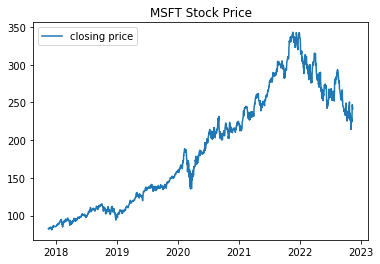

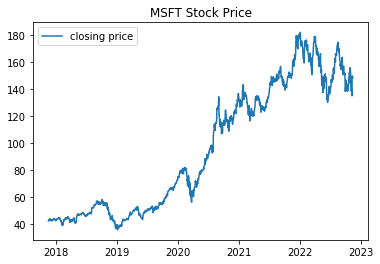

In [7]:
'''
2개의 지정 주식에 대한 종장 시세로 최소 그래프를 그린다.
file stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

def do_plot(stock_df):
    '''플롯을 수행하는 함수
    stock_df를 사용하여 웹에서 주식 데이터 프레임을 읽어온다.
    '''
    column = stock_df.Close                    # 시세 추출
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label = 'closing price')            # 플룻 수행
    plt.legend()
    plt.title('MSFT Stock Price')
    plt.show()                                 # 그래프 출력
    
# 2개의 테스트 케이스 수행
if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_plot(stock_df)
    stock_df = load_stock('AAPL')
    do_plot(stock_df)

# 15.6 makeplot 함수 작성하기(리팩터링)

In [8]:
def makeplot(stock_df, field, my_str):
    column = getattr(stock_df, field)
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()
    
def do_plot(stock_df, name_str):
    makeplot(stock_df, 'Close', 'closing price')
    plt.title(name_str + ' Stock Price')
    plt.show()

# 15.7 2개의 주식 시세를 함께 그래프로 그리기

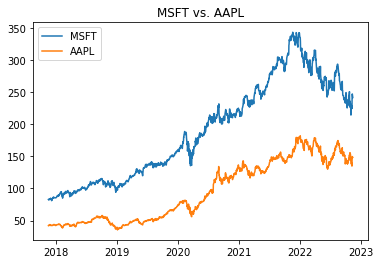

In [10]:
def do_duo_plot(stock1_df, stock2_df):
    '''개정된 do_plot 함수
    이번에는 2개의 주식 데이터 프레임을 처리한다.
    모두 함께 그래프로 표현한다.
    '''
    makeplot(stock1_df, 'Close', 'MSFT')
    makeplot(stock2_df, 'Close', 'AAPL')
    plt.title('MSFT vs. AAPL')
    plt.show()

if __name__ == '__main__':
    stock1_df = load_stock('MSFT')
    stock2_df = load_stock('AAPL')
    do_duo_plot(stock1_df, stock2_df)

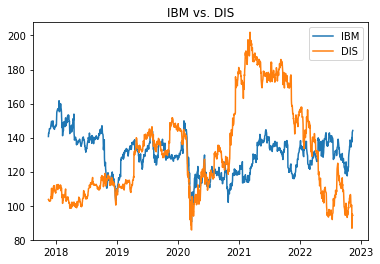

In [12]:
'''
2개의 주식 시세 그래프를 그린다.
stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock


def do_duo_plot(stock1_df, stock2_df, name1, name2):
    '''두 주식의 그래프를 그린다.
    인수는 데이터 프레임과
    열의 이름으로 사용할 주식 시세 기호 문자열이다.
    '''
    makeplot(stock1_df, 'Close', name1)
    makeplot(stock2_df, 'Close', name2)
    plt.title(name1 + ' vs. ' + name2)
    plt.show()


# 플롯을 만든다: 지루하고 반복적인 작업을 수행한다.
def makeplot(stock_df, field, my_str):
    column = getattr(stock_df, field)
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()

# 메인 모듈이면 테스트를 수행한다.
if __name__ == '__main__':
    stock1_df = load_stock('IBM')
    stock2_df = load_stock('DIS')
    do_duo_plot(stock1_df, stock2_df, 'IBM', 'DIS')

# 15.8 응용: 다른 데이터 그래프 그리기

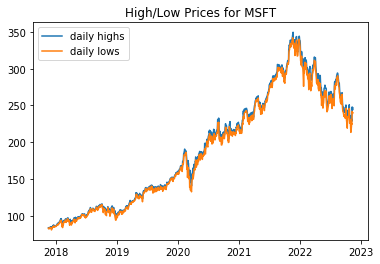

In [2]:
'''
주식의 일일 최고가와 최저가를 그래프로 표현한다.
stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock


def do_highlow_plot(stock_df, name_str):
    '''
    일일 최고가와 최저가의 점을 구한다.
    인수로 전달받은 주식 데이터 프레임(stock_df)의
    일일 주식을 위한 최고가와 최저가 열을 사용한다.
    '''
    makeplot(stock_df, 'High', 'daily highs')
    makeplot(stock_df, 'Low', 'daily lows')
    plt.title('High/Low Prices for ' + name_str)
    plt.show()


# 플롯을 만든다: 지루하고 반복적인 작업을 수행한다.
def makeplot(stock_df, field, my_str):
    column = getattr(stock_df, field)
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()

# 메인 모듈이면 테스트를 수행한다.
if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_highlow_plot(stock_df, 'MSFT')

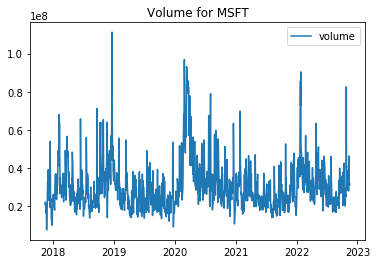

In [3]:
def do_volume_plot(stock_df, name_str):
    '''전달받은 데이터 프레임(stock_df)의
    일일 주식 판매량을 그래프로 표현한다. data frame (stock_df)
    '''
    makeplot(stock_df, 'Volume', 'volume')
    plt.title('Volume for ' + name_str)
    plt.show()
    
# 메인 모듈이면 테스트를 수행한다.
if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_volume_plot(stock_df, 'MSFT')

# 15.9 기간 제한하기

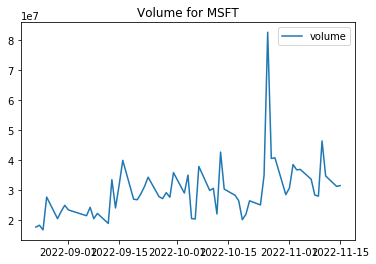

In [4]:
def do_volume_plot(stock_df, name_str):
    '''전달받은 주식의 일일 판매량인 데이터 프레임(stock_df)을 그래프로 그린다.
    최근 60일 치 데이터를 그래프로 표현한다.
    '''
    stock_df = stock_df[-60:].reset_index()
    makeplot(stock_df, 'Volume', 'volume')
    plt.title('Volume for ' + name_str)
    plt.show()
    
# 메인 모듈이면 테스트를 수행한다.
if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_volume_plot(stock_df, 'MSFT')

# 15.10 차트 쪼개기: 판매량 서브플롯

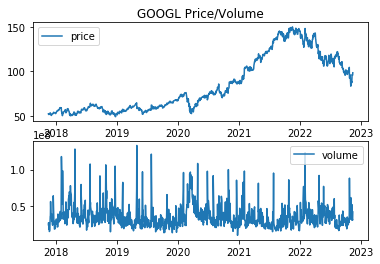

In [8]:
def do_split_plot(stock_df, name_str):
    '''서브플롯이 있는 그래프를 그린다.
    웹에서 읽어 온 주식 데이터 프레임 stock_df를 사용한다.
    '''
    plt.subplot(2, 1, 1)                 # 위쪽 그래프를 그린다
    makeplot(stock_df, 'Close', 'price')
    plt.title(name_str + ' Price/Volume')
    plt.subplot(2, 1, 2)                  # 아래쪽 그래프를 그린다
    makeplot(stock_df, 'Volume', 'volume')
    plt.show()
    
# 메인 모듈이면 테스트를 수행한다.
if __name__ == '__main__':
    stock_df = load_stock('GOOGL')
    do_split_plot(stock_df, 'GOOGL')

# 15.11 변동 평균 선 추가하기

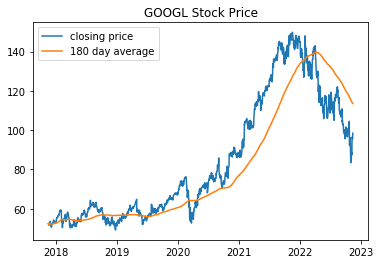

In [12]:
# 플롯을 만든다: 지루하고 반복적인 작업을 수행한다.
def makeplot(stock_df, field, my_str, avg=0):
    column = getattr(stock_df, field)
    if avg:                     # avg가 0일 때만 실행!
        column = column.rolling(avg, min_periods=1).mean()
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()
    
def do_movingavg_plot(stock_df, name_str):
    '''변동 평균 플롯 함수 수행하기
    180일 변동 평균 선과 함께 가격을 그래프로 그린다.
    '''
    makeplot(stock_df, 'Close', 'closing price')
    makeplot(stock_df, 'Close', '180 day average', 180)
    plt.title(name_str + ' Stock Price')
    plt.show()

# 메인 모듈이면 테스트를 수행한다.
if __name__ == '__main__':
    stock_df = load_stock('GOOGL')
    do_movingavg_plot(stock_df, 'GOOGL')

# 15.12 사용자에게 선택권 넘기기

주식 시세 기호를 입력하세요(종료하려면 엔터를 입력하세요): AAPL
메뉴 선택:
0. 종료
1. 간단한 종가 그래프 출력
2. 일일 최고가와 최저가 출력
3. 가격/판매량 서브플롯 출력
4. 변동 평균을 추가한 가격
선택한 메뉴를 입력하세요: 4


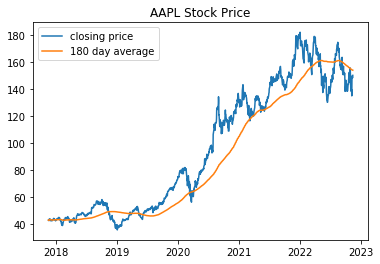

주식 시세 기호를 입력하세요(종료하려면 엔터를 입력하세요): IBM
메뉴 선택:
0. 종료
1. 간단한 종가 그래프 출력
2. 일일 최고가와 최저가 출력
3. 가격/판매량 서브플롯 출력
4. 변동 평균을 추가한 가격
선택한 메뉴를 입력하세요: 3


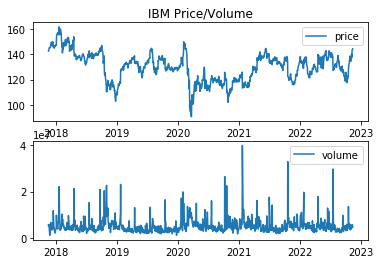

주식 시세 기호를 입력하세요(종료하려면 엔터를 입력하세요): 


In [16]:
# stock_demo.py
# stock_plot_v4.py 파일에 의존성이 있다.

from stock_plot_v4 import *

menu_str = ('메뉴 선택:\n' +
           '0. 종료\n' +
           '1. 간단한 종가 그래프 출력\n' +
           '2. 일일 최고가와 최저가 출력\n' +
           '3. 가격/판매량 서브플롯 출력\n' +
           '4. 변동 평균을 추가한 가격\n')

prompt_msg = '주식 시세 기호를 입력하세요(종료하려면 엔터를 입력하세요): '
def main():
    while True:
        # 유효한 주식을 사용자에게 입력받을 때까지 프롬프트를 띄운다.
        try:
            s = input(prompt_msg)
            s = s.strip()
            if not s:           # 빈 문자열이면 루프를 탈출한다.
                return
            stock_df = load_stock(s)
            n = int(input(menu_str + '선택한 메뉴를 입력하세요: '))
            
            if n < 0 or n > 4:
                n = 0
            if n == 0:
                return
            
            fn = [do_simple_plot, do_highlow_plot, do_volume_subplot, do_movingavg_plot][n-1]
            fn(stock_df, s)
        except:
            print('주식을 찾지 못했습니다. 다시 시도하세요. ')
            
main()